<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/FeatureEngineering_and_PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Optional Lab: Feature Engineering and Polynomial Regression

This notebook demonstrates:
- Creating polynomial **features** (e.g., $x, x^2, x^3$)
- Fitting models with **gradient descent**
- Visualizing fits **with** and **without** feature engineering
- Inspecting learned parameters

We use a simple target function: $y = 1 + x^2$.


In [1]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)


## Helpers: cost, gradient, and gradient descent

In [2]:

def predict(X, w, b):
    """
    Predicts output values given input features X, weights w, and bias b.
    Uses the linear regression equation: y_hat = Xw + b
    """
    return X @ w + b  # Matrix multiplication between X and w, plus bias


def compute_cost(X, y, w, b):
    """
    Computes the Mean Squared Error (MSE) cost for linear regression.

    Formula: J = (1 / (2*m)) * Σ( y_hat - y )²
    - m: number of training examples
    - y_hat: predicted values
    """
    m = X.shape[0]               # Number of samples
    e = predict(X, w, b) - y     # Prediction error vector
    return (e @ e) / (2 * m)     # Vector dot product to sum squared errors


def compute_gradient(X, y, w, b):
    """
    Computes the gradient (partial derivatives) of the cost function
    with respect to weights (dj_dw) and bias (dj_db).

    Formula:
    - dj_dw = (1/m) * Xᵀ * (y_hat - y)
    - dj_db = (1/m) * Σ( y_hat - y )
    """
    m = X.shape[0]               # Number of samples
    e = predict(X, w, b) - y     # Prediction error
    dj_dw = (X.T @ e) / m        # Gradient for weights
    dj_db = np.sum(e) / m        # Gradient for bias
    return dj_dw, dj_db


def gradient_descent(X, y, w_init=None, b_init=0.0, alpha=1e-2, iters=1000, trace=False):
    """
    Performs gradient descent to optimize weights and bias.

    Parameters:
    - X: feature matrix
    - y: target values
    - w_init: optional initial weights (default: zeros)
    - b_init: initial bias (default: 0.0)
    - alpha: learning rate
    - iters: number of iterations
    - trace: if True, stores intermediate (cost, w, b) for analysis

    Returns:
    - w: optimized weights
    - b: optimized bias
    - J_hist: cost history over iterations
    - tr: trace of (cost, w, b) if trace=True
    """
    n = X.shape[1]                               # Number of features
    w = np.zeros(n) if w_init is None else w_init.astype(float).copy()
    b = float(b_init)
    J_hist = []                                  # Store cost values for plotting
    tr = []                                      # Store trace info if enabled

    for t in range(1, iters + 1):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Update parameters using gradient descent rule
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute and store current cost
        J = compute_cost(X, y, w, b)
        J_hist.append(J)

        # Store trace information for debugging/visualization
        if trace and t <= 2000:
            tr.append((J, w.copy(), b))

    return w, b, np.array(J_hist), tr



## Data: quadratic target $y = 1 + x^2$

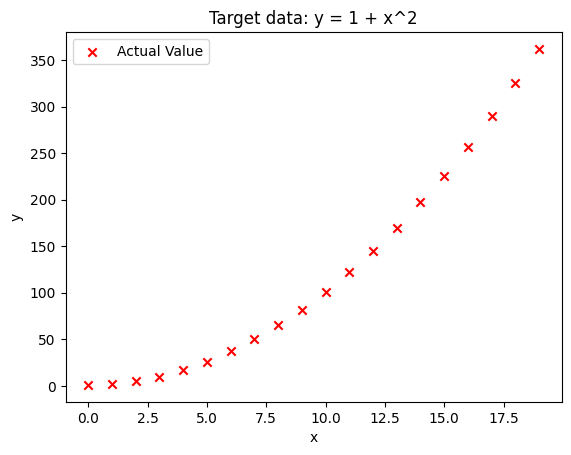

In [3]:
# Create target data
x = np.arange(0, 20, 1, dtype=float)   # Generate values from 0 to 19 with step 1 (float type)
y = 1 + x**2                           # Compute target y values using the quadratic formula y = 1 + x^2

# Reshape x into a column vector (n_samples x 1) for use in ML models
# (20, 1): to make it into a 2D array with 1 feature
x_lin = x.reshape(-1, 1)               # "-1" infers the number of rows automatically

# Plot the data
plt.scatter(x, y, marker='x', c='r', label="Actual Value")  # Red 'x' markers for data points
plt.title("Target data: y = 1 + x^2")                       # Title for plot
plt.xlabel("x")                                             # X-axis label
plt.ylabel("y")                                             # Y-axis label
plt.legend()                                                 # Show legend for clarity
plt.show()                                                   # Display the plot


## 1) No feature engineering (linear model on raw x)

No FE → w: [18.69807] b: -52.08341025448668  final cost: 440.96498271972115


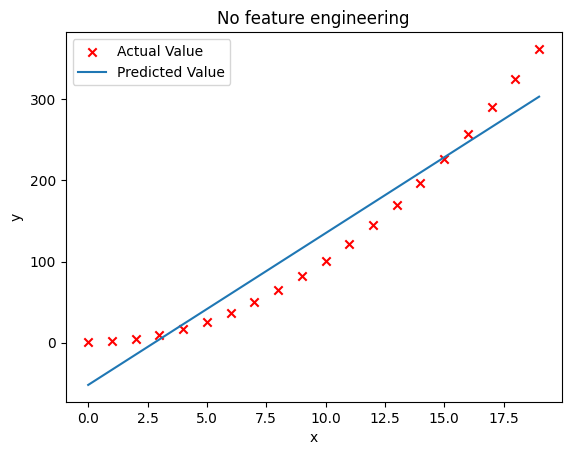

Iteration    0, Cost: 1.657563e+03
Iteration  100, Cost: 6.959231e+02
Iteration  200, Cost: 5.892793e+02
Iteration  300, Cost: 5.268841e+02
Iteration  400, Cost: 4.903778e+02
Iteration  500, Cost: 4.690187e+02
Iteration  600, Cost: 4.565219e+02
Iteration  700, Cost: 4.492102e+02
Iteration  800, Cost: 4.449323e+02
Iteration  900, Cost: 4.424294e+02
Iteration 1000, Cost: 4.409650e+02


In [4]:
# Use only the original x feature (no feature engineering / polynomial terms)
X = x_lin

# Run gradient descent to learn w and b
# - alpha = 1e-2: learning rate
# - iters = 1000: number of iterations
# - Returns: learned weights, bias, cost history, and optional trace
w, b, J_hist, _ = gradient_descent(X, y, alpha=1e-2, iters=1000)

# Print the final learned parameters and cost
print("No FE → w:", w, "b:", b, " final cost:", J_hist[-1])

# Plot actual vs predicted values
plt.scatter(x, y, marker='x', c='r', label="Actual Value")   # Red 'x' for actual data points
plt.plot(x, X @ w + b, label="Predicted Value")              # Line for model predictions
plt.xlabel("x")
plt.ylabel("y")
plt.title("No feature engineering")
plt.legend()
plt.show()

# Print cost at specific iteration checkpoints to monitor convergence
for t in range(0, 1001, 100):
    if t == 0:
        print(f"Iteration {t:4d}, Cost: {J_hist[0]:.6e}")     # Cost after first iteration
    else:
        print(f"Iteration {t:4d}, Cost: {J_hist[t-1]:.6e}")   # Cost after every 100 iterations

#Plot: The prediction is a straight line, which cannot fit the curve of the true quadratic data.

## 2) Polynomial feature: replace x with $x^2$

Using x^2 → w: [1.004175] b: 0.04896443659681638  final cost: 0.20705899797988078


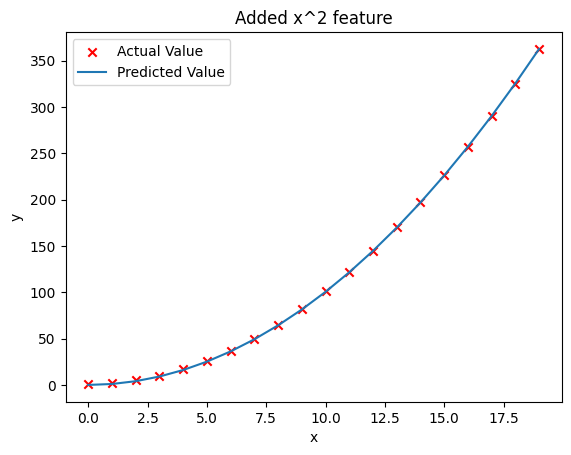

In [5]:
# Feature engineering: use x^2 instead of x
# Since the true relationship is y = 1 + x^2, this feature should fit perfectly
x_sq = (x**2).reshape(-1, 1)   # Compute square of each x, reshape into column vector
X = x_sq

# Run gradient descent on the new feature
# - Smaller learning rate (alpha=1e-5) is needed because x^2 values are much larger
# - More iterations (10,000) to ensure convergence
w2, b2, J_hist2, _ = gradient_descent(X, y, alpha=1e-5, iters=10_000)

# Print the learned parameters and final cost
print("Using x^2 → w:", w2, "b:", b2, " final cost:", J_hist2[-1])

# Plot actual vs predicted values
plt.scatter(x, y, marker='x', c='r', label="Actual Value")   # Actual quadratic data
plt.plot(x, X @ w2 + b2, label="Predicted Value")            # Model predictions
plt.xlabel("x")
plt.ylabel("y")
plt.title("Added x^2 feature")
plt.legend()
plt.show()
##Plot: The predicted curve (blue) matches the actual quadratic data (red) almost perfectly.

## 3) Polynomial regression with multiple features: $[x, x^2, x^3]$

Using [x, x^2, x^3] → w: [0.084473 0.546083 0.027118] b: 0.011039016941710573  final cost: 82.31565824135086


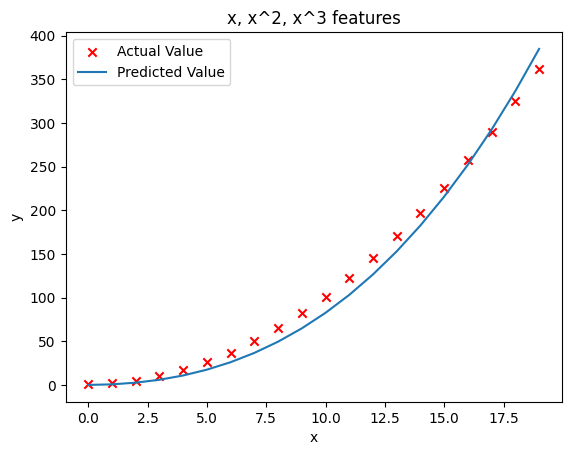


Model (approx): y ≈ 0.0845·x + 0.5461·x^2 + 2.7118e-02·x^3 + 0.0110


In [6]:
# Create multiple polynomial features:
#  - Column 1: x       (linear term)
#  - Column 2: x^2     (quadratic term)
#  - Column 3: x^3     (cubic term)
# Resulting shape: (number_of_samples, 3)
X = np.c_[x_lin, x**2, x**3] #concatenate these arrays as columns to make one 2-D feature matrix.

# Run gradient descent:
# - Very small learning rate (alpha=1e-7) because higher powers of x
#   create large values, which can make gradient steps too large
# - Many iterations (10,000) to ensure convergence
w3, b3, J_hist3, _ = gradient_descent(X, y, alpha=1e-7, iters=10_000)

# Show learned parameters and final cost
print("Using [x, x^2, x^3] → w:", w3, "b:", b3, " final cost:", J_hist3[-1])

# Plot actual vs predicted values
plt.scatter(x, y, marker='x', c='r', label="Actual Value")  # Red 'x' = real data
plt.plot(x, X @ w3 + b3, label="Predicted Value")           # Model predictions
plt.xlabel("x")
plt.ylabel("y")
plt.title("x, x^2, x^3 features")
plt.legend()
plt.show()

# Display polynomial fit in equation form
print("\nModel (approx): y ≈ "
      f"{w3[0]:.4f}·x + {w3[1]:.4f}·x^2 + {w3[2]:.4e}·x^3 + {b3:.4f}")

# Plot: The fit is still good, but not perfect — the line slightly overshoots in places.

## 4) Cost curves for each setup

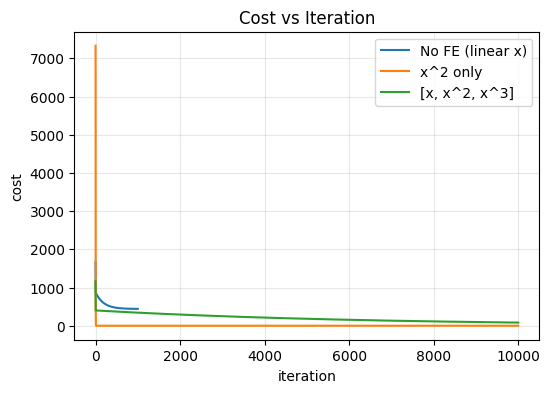

In [7]:

plt.figure(figsize=(6,4))
plt.plot(J_hist, label="No FE (linear x)")
plt.plot(J_hist2, label="x^2 only")
plt.plot(J_hist3, label="[x, x^2, x^3]")
plt.xlabel("iteration"); plt.ylabel("cost"); plt.title("Cost vs Iteration"); plt.legend(); plt.grid(True, alpha=0.3)
plt.show()

##Plot: Matching features to the true relationship (here x2) gives the fastest, most accurate convergence.
##Extra or irrelevant features(x3) can still learn the correct model but slow down convergence.
#Wrong features (only x) limit the model’s ability to fit the data, keeping the final cost high.